# Data Wrangling
##### with pandas Cheat Sheet http://pandas.pydata.org

## Tidy Data 
#### A foundation for wrangling in pandas
#### In a tidy data set: 
##### Each variable is saved in its own column. 
##### Each observation is saved in its own row.
#### Tidy data complements pandas’s vectorized operations. pandas will automatically preserve observations as you manipulate variables. No other format works as intuitively with pandas.

## Creating DataFrames

In [22]:
import pandas as pd                           #Import Pandas

df = pd.DataFrame(

{"a" : [4, 5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = [1, 2, 3])                            #Specify values for each column.

df = pd.DataFrame(
[[4, 7, 10],
[5, 8, 11],
[6, 9, 12]],
index=[1, 2, 3],
columns=['a', 'b', 'c'])                      #Specify values for each row.

df = pd.DataFrame(
    {"a" : [4 ,5, 6],
     "b" : [7, 8, 9],
     "c" : [10, 11, 12]},
 index = pd.MultiIndex.from_tuples(
    [('d', 1), ('d', 2),
    ('e', 2)], names=['n', 'v']))             #Create DataFrame with a MultiIndex

df


a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12

In [69]:




df1 =pd.DataFrame(
    
{"Valor"  : [1000, 600, 8999],
 "cemita" : [1056, 656, 8565],
 "ayer"   : [1067, 650, 8857]},
    index = [1,2,3])
df1

df2 =pd.DataFrame(
    
{"variable"  : [1055, 600, 8315],
 "value" : [1023, 656, 8445]},
    index = [1,2,3])


df1
df2

 

,variable,value
1,1055,1023
2,600,656
3,8315,8445


## Method Chaining
##### Most pandas methods return a DataFrame so that another pandas method can be applied to the result. This improves readability of code.

In [71]:
df3 = (pd.melt(df2)).rename(columns={'variable':'var','value':'val'}).query('val >= 200')
df3



E:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


,var,val
0,variable,1055
1,variable,600
2,variable,8315
3,value,1023
4,value,656
5,value,8445


## Reshapin Data
##### Change layout, sorting, reindexing, renaming

In [83]:
pd.melt(df2)                                #Gather columns into rows.
df3.pivot(columns='var', values='val')      #Spread rows into columns.
P1 = pd.concat([df,df3])                       #Append rows of DataFrames
P1
P2 = pd.concat([df,df3], axis=1)               #Append columns of DataFrames
P2
df.sort_values('mpg')                      #Order rows by values of a column (low to high).
df.sort_values('mpg', ascending=False)     #Order rows by values of a column (high to low).
df.rename(columns = {'y':'year'})          #Rename the columns of a DataFrame
df.sort_index()                            #Sort the index of a DataFrame
df.reset_index()                           #Reset index of DataFrame to row numbers, moving index to columns.
df.drop(columns=['Length', 'Height'])      #Drop columns from DataFrame

E:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


KeyError: 'mpg'

## Subset Observations - rows

In [73]:
df[df.Length > 7]                         #Extract rows that meet logical criteria.
df.drop_duplicates()                      #Remove duplicate rows (only considers columns).
df.sample(frac=0.5)                       #Randomly select fraction of rows.
df.sample(n=10)                           #Randomly select n rows.
df.nlargest(n, 'value')                   #Select and order top n entries.
df.nsmallest(n, 'value')                  #Select and order bottom n entries.
df.head(n)                                #Select first n rows.
df.tail(n)                                #Select last n rows.

AttributeError: 'DataFrame' object has no attribute 'Length'

## Subset Variables - columns

In [74]:
df[['width', 'length', 'species']]      #Select multiple columns with specific names.
df['width'] or df.width                 #Select single column with specific name.
df.filter(regex='regex')                #Select columns whose name matches regular expression regex.

KeyError: "None of [Index(['width', 'length', 'species'], dtype='object')] are in the [columns]"

## Using query
##### query() allows Boolean expressions for filtering rows.

In [53]:
df.query('Length > 7')
df.query('Length > 7 and Width < 8')
df.query('Name.str.startswith("abc")', engine="python")

UndefinedVariableError: name 'Length' is not defined

## Subsets - rows and columns
##### Use df.loc[] and df.iloc[] to select only rows, only columns or both.
##### Use df.at[] and df.iat[] to access a single value by row and column.
##### First index selects rows, second index columns.

In [54]:
df.iloc[10:20]                                #Select rows 10-20.
df.iloc[:, [1, 2, 5]]                         #Select columns in positions 1, 2 and 5 (first column is 0).
df.loc[:, 'x2':'x4']                          #Select all columns between x2 and x4 (inclusive).
df.loc[df['a'] > 10, ['a', 'c']]              #Select rows meeting logical condition, and only the specific columns .
df.iat[1, 2]                                  #Access single value by index
df.at[4, 'A']                                 #Access single value by label

IndexError: positional indexers are out-of-bounds

#### Logic in Python (and pandas)

In [55]:
df1 = pd.DataFrame()
S = ['<', '>', '==','<=','>=']
SI = ['less than', 'geater than', 'equals','less than or equals','greater than or equals']
S2 = ['!=', 'df.column.isin(values)', 'pd.isnull(obj)','pd.notnull(obj)','&,|,~,^,df.any(),df.all()']
S3 = ['not equal to','group membership', 'is NaN', 'is not NaN','Logical and, or, not, xor, any, all']

df1['Signo'] = S
df1['Significado'] = SI
df1['Codigo'] = S2
df1['Respuesta'] = S3
 
# display table
print(df1)

  Signo             Significado                     Codigo  \
0     <               less than                         !=   
1     >             geater than     df.column.isin(values)   
2    ==                  equals             pd.isnull(obj)   
3    <=     less than or equals            pd.notnull(obj)   
4    >=  greater than or equals  &,|,~,^,df.any(),df.all()   

                             Respuesta  
0                         not equal to  
1                     group membership  
2                               is NaN  
3                           is not NaN  
4  Logical and, or, not, xor, any, all  


#### regex (Regular Expresions) Examples

In [56]:
df2 = pd.DataFrame()
M = ['\.', 'Length$', '^Sepal','^x[1-5]$','^(?!Species$).*']
MI = ['Matches strings containing a period "."', 'Matches strings ending with word "Length"', 'Matches strings beginning with the word "Sepal"',
      'Matches strings beginning with "x" and ending with 1,2,3,4,5','Matches strings except the string "Species"']

df2['Expresion'] = M
df2['Significado'] = MI

 
# display table
print(df2)

         Expresion                                        Significado
0               \.            Matches strings containing a period "."
1          Length$          Matches strings ending with word "Length"
2           ^Sepal    Matches strings beginning with the word "Sepal"
3         ^x[1-5]$  Matches strings beginning with "x" and ending ...
4  ^(?!Species$).*        Matches strings except the string "Species"


## Sumarize Data

In [57]:
df['w'].value_counts()            #Count number of rows with each unique value of variable
len(df)                           #Number of rows in DataFrame.
df.shape                          #Tuple of # of rows, # of columns in DataFrame.
df['w'].nunique()                 #Number of distinct values in a column.
df.describe()                     #Basic descriptive and statistics for each column (or GroupBy).

KeyError: 'w'

##### pandas provides a large set of summary functions that operate on different kinds of pandas objects (DataFrame columns, Series, GroupBy, Expanding and Rolling (see below)) and produce single values for each of the groups. When applied to a DataFrame, the result is returned as a pandas Series for each column. Examples:

In [58]:
sum()                             #Sum values of each object.
count()                           #Count non-NA/null values of each object.
median()                          #Median value of each object.
quantile([0.25,0.75])             #Quantiles of each object.
apply(function)                   #Apply function to each object.
min()                             #Minimum value in each object.
max()                             #Maximum value in each object.
mean()                            #Mean value of each object.
var()                             #Variance of each object.
std()                             #Standard deviation of each object.

TypeError: sum() takes at least 1 positional argument (0 given)

## Handling Missing Data

In [59]:
df.dropna() #Drop rows with any column having NA/null data.
df.fillna(value) #Replace all NA/null data with value.

NameError: name 'value' is not defined

## Make New Columns

In [60]:
df.assign(Area=lambda df: df.Length*df.Height) #Compute and append one or more new columns.
df['Volume'] = df.Length*df.Height*df.Depth    #Add single column.
pd.qcut(df.col, n, labels=False)               #Bin column into n buckets.

AttributeError: 'DataFrame' object has no attribute 'Length'

##### pandas provides a large set of vector functions that operate on all columns of a DataFrame or a single selected column (a pandas Series). These functions produce vectors of values for each of the columns, or a single Series for the individual Series. Examples:

In [61]:
max(axis=1)                                   #Element-wise max.
clip(lower=-10,upper=10)                      #Trim values at input thresholds

min(axis=1)                                   #Element-wise min.
abs()                                         #Absolute value.

TypeError: max expected at least 1 argument, got 0

## Goup Data

In [62]:
df.groupby(by="col")                          #Return a GroupBy object, grouped by values in column named "col".
df.groupby(level="ind")                       #Return a GroupBy object, grouped by values in index level named "ind".

KeyError: 'col'

##### All of the summary functions listed above can be applied to a group.
##### Additional GroupBy functions:

In [63]:
size()                                        #Size of each group.
agg(function)                                 #Aggregate group using function.

NameError: name 'size' is not defined

##### The examples below can also be applied to groups. In this case, the function is applied on a per-group basis, and the returned vectors are of the length of the original DataFrame.

In [64]:
shift(1)                                      #Copy with values shifted by 1.
rank(method='dense')                          #Ranks with no gaps.
rank(method='min')                            #Ranks. Ties get min rank.
rank(pct=True)                                #Ranks rescaled to interval [0, 1].
rank(method='first')                          #Ranks. Ties go to first value.

shift(-1)                                     #Copy with values lagged by 1.
cumsum()                                      #Cumulative sum.
cummax()                                      #Cumulative max.
cummin()                                      #Cumulative min.
cumprod()                                     #Cumulative product.

NameError: name 'shift' is not defined

## Windows

In [65]:
df.expanding()                                #Return an Expanding object allowing summary functions to be applied cumulatively.
df.rolling(n)                                 #Return a Rolling object allowing summary functions to be applied to windows of length n.

NameError: name 'n' is not defined

## Ploting

KeyError: 'w'

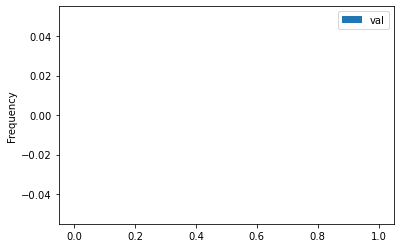

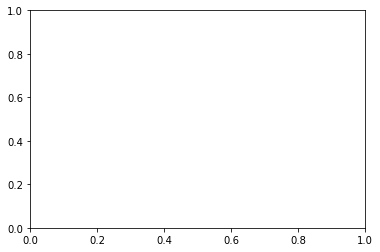

In [66]:
from matplotlib import pyplot as plt
df.plot.hist()                               #Histogram for each column
df.plot.scatter(x='w',y='h')                 #Scatter chart using pairs of points

## Combine Data Sets
##### Standard Joins

In [ ]:
pd.merge(adf, bdf,how='left', on='x1')                   #Join matching rows from bdf to adf.
pd.merge(adf, bdf,how='right', on='x1')                  #Join matching rows from adf to bdf.
pd.merge(adf, bdf,how='inner', on='x1')                  #Join data. Retain only rows in both sets.
pd.merge(adf, bdf,how='outer', on='x1')                  #Join data. Retain all values, all rows.

##### Filtering Joins

In [ ]:
adf[adf.x1.isin(bdf.x1)]                                #All rows in adf that have a match in bdf.
adf[~adf.x1.isin(bdf.x1)]                               #All rows in adf that do not have a match in bdf.

##### Set-like Operations

In [ ]:
pd.merge(ydf, zdf)                                      #Rows that appear in both ydf and zdf (Intersection).
pd.merge(ydf, zdf, how='outer')                         #Rows that appear in either or both ydf and zdf (Union).
pd.merge(ydf, zdf, how='outer',indicator=True)
.query('_merge == "left_only"')
.drop(columns=['_merge'])                               #Rows that appear in ydf but not zdf (Setdiff).